In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [277]:
#opening csv file through pandas

In [278]:
infy_=pd.read_csv('hdfc_bank_stock.csv')
infy_.head(5)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,29-April-2022,1379.9,1404.7,1372.00,1384.75,1390.304738,226194,11568,314478590.0,75211,33.25,32.70,4.85
1,28-April-2022,1375.0,1375.8,1362.00,1371.05,1368.488125,250493,18002,342796696.0,136217,54.38,13.80,-3.95
2,27-April-2022,1360.0,1378.3,1355.25,1372.65,1370.184743,359986,21776,493247325.0,223863,62.19,23.05,12.65
3,26-April-2022,1374.8,1383.8,1357.15,1372.35,1371.446023,198963,11434,272867015.0,76232,38.31,26.65,-2.45
4,25-April-2022,1352.6,1370.7,1323.90,1365.55,1351.123613,274235,14205,370525384.0,98741,36.01,46.80,12.95


In [279]:
#business problem - HDFC bank stock- goal predict trade call (buy, sell, hold)
#but first for numerical attributes of data

In [280]:
infy_.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,649.000000,649.000000,649.000000,649.000000,649.000000,6.490000e+02,649.000000,6.490000e+02,6.490000e+02,649.000000,649.000000,649.000000
mean,1331.473883,1345.544761,1314.113097,1329.727812,1329.659543,4.677065e+05,15103.352851,5.789700e+08,2.262280e+05,46.168320,31.431664,-1.746071
std,210.969864,210.171376,212.555669,211.375207,211.758887,5.150626e+05,12271.057521,6.011938e+08,3.087755e+05,18.583707,17.882234,21.516255
min,770.000000,825.000000,738.900000,765.450000,773.688762,4.108400e+04,2219.000000,5.277925e+07,1.644900e+04,2.150000,7.700000,-111.500000
25%,1200.000000,1214.800000,1181.000000,1199.000000,1198.991939,1.890560e+05,7256.000000,2.489697e+08,6.997400e+04,32.300000,20.100000,-13.500000
50%,1398.700000,1409.900000,1375.250000,1394.850000,1396.254130,3.103280e+05,11997.000000,4.223467e+08,1.243240e+05,44.670000,27.050000,-2.350000
75%,1502.000000,1517.250000,1488.150000,1501.500000,1501.188403,5.637720e+05,19494.000000,6.709933e+08,2.595330e+05,59.120000,37.200000,9.900000
max,1709.950000,1724.300000,1671.150000,1688.950000,1694.268105,4.766929e+06,165536.000000,6.136969e+09,2.599335e+06,97.170000,161.800000,94.150000


In [281]:
#to check null value

In [282]:
infy_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       649 non-null    object 
 1   Open Price                 649 non-null    float64
 2   High Price                 649 non-null    float64
 3   Low Price                  649 non-null    float64
 4   Close Price                649 non-null    float64
 5   WAP                        649 non-null    float64
 6   No.of Shares               649 non-null    int64  
 7   No. of Trades              649 non-null    int64  
 8   Total Turnover (Rs.)       649 non-null    float64
 9   Deliverable Quantity       649 non-null    int64  
 10  % Deli. Qty to Traded Qty  649 non-null    float64
 11  Spread High-Low            649 non-null    float64
 12  Spread Close-Open          649 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 6

In [283]:
#exploring data visually- seeing how close price changes

Text(0.5, 1.0, 'fig1')

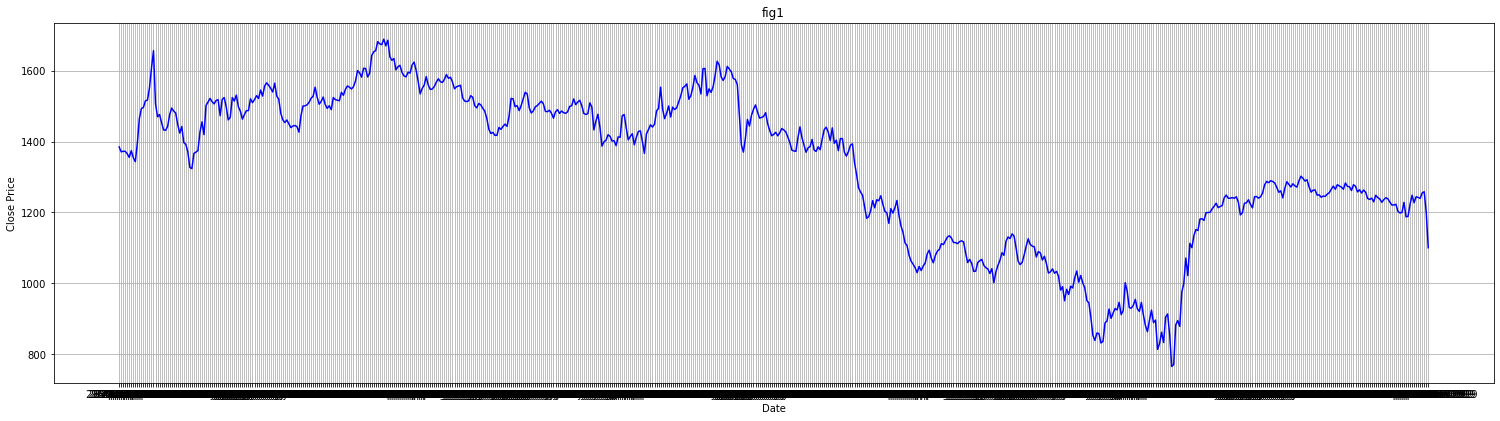

In [284]:
fig=plt.figure(figsize=(20,5))

axes=fig.add_axes([0,0,1,1])
axes.grid(True)
axes.plot(infy_['Date'],infy_['Close Price'],'b')
axes.set_xlabel('Date')
axes.set_ylabel('Close Price')
axes.set_title('fig1')

In [285]:
#extracting variable from dataset-
#adding columns- rolling mean(SMA)- 14 day- middle band in Bollinger bands

In [286]:
rolling_14=infy_['Close Price'].rolling(14).mean()

std_14=infy_['Close Price'].rolling(14).std()
rolling_14

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
644    1219.710714
645    1222.128571
646    1224.667857
647    1224.450000
648    1217.439286
Name: Close Price, Length: 649, dtype: float64

In [287]:
#now calculate and add 2*S.D.
infy_['Upper_band']= rolling_14 + 2*std_14


infy_['Lower_band']= rolling_14 - 2*std_14


infy_['rolling_14']= rolling_14


In [288]:
infy_

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Upper_band,Lower_band,rolling_14
0,29-April-2022,1379.90,1404.70,1372.00,1384.75,1390.304738,226194,11568,3.144786e+08,75211,33.25,32.70,4.85,NaN,NaN,NaN
1,28-April-2022,1375.00,1375.80,1362.00,1371.05,1368.488125,250493,18002,3.427967e+08,136217,54.38,13.80,-3.95,NaN,NaN,NaN
2,27-April-2022,1360.00,1378.30,1355.25,1372.65,1370.184743,359986,21776,4.932473e+08,223863,62.19,23.05,12.65,NaN,NaN,NaN
3,26-April-2022,1374.80,1383.80,1357.15,1372.35,1371.446023,198963,11434,2.728670e+08,76232,38.31,26.65,-2.45,NaN,NaN,NaN
4,25-April-2022,1352.60,1370.70,1323.90,1365.55,1351.123613,274235,14205,3.705254e+08,98741,36.01,46.80,12.95,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,25-September-2019,1251.00,1251.05,1230.40,1239.70,1238.100285,493675,8733,6.112192e+08,125745,25.47,20.65,-11.30,1261.161300,1178.260129,1219.710714
645,24-September-2019,1257.25,1261.65,1228.00,1255.05,1244.569634,600098,11804,7.468637e+08,82497,13.75,33.65,-2.20,1267.697770,1176.559373,1222.128571
646,23-September-2019,1255.35,1285.00,1230.00,1258.45,1257.546617,957396,29747,1.203970e+09,249243,26.03,55.00,3.10,1274.210917,1175.124797,1224.667857
647,20-September-2019,1108.00,1208.90,1107.10,1200.10,1146.403812,1334801,27720,1.530221e+09,716899,53.71,101.80,92.10,1274.425594,1174.474406,1224.450000


<bound method Axes.plot of <Axes:>>

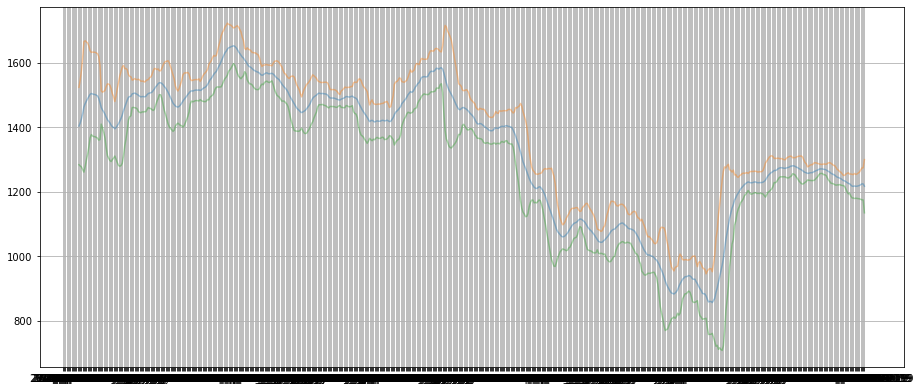

In [289]:
#now data visualization
fig_bb=plt.figure(figsize=(12,5))
axes_bb=fig_bb.add_axes([0,0,1,1])
axes_bb.grid(True)
axes_bb.plot(infy_.Date,rolling_14,label='Rolling_14',alpha=0.4)
axes_bb.plot(infy_.Date,infy_.Upper_band,label='Upper_band',alpha=0.4)
axes_bb.plot(infy_.Date,infy_.Lower_band,label='Lower_band',alpha=0.4)
axes_bb.plot


In [290]:
infy_.rolling_14.isnull().value_counts()


False    636
True      13
Name: rolling_14, dtype: int64

In [291]:
infy_.Upper_band.isnull().value_counts()


False    636
True      13
Name: Upper_band, dtype: int64

In [292]:
infy_.Lower_band.isnull().value_counts()


False    636
True      13
Name: Lower_band, dtype: int64

In [293]:
infy_1=infy_.dropna(axis=0)


In [294]:
infy_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 13 to 648
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       636 non-null    object 
 1   Open Price                 636 non-null    float64
 2   High Price                 636 non-null    float64
 3   Low Price                  636 non-null    float64
 4   Close Price                636 non-null    float64
 5   WAP                        636 non-null    float64
 6   No.of Shares               636 non-null    int64  
 7   No. of Trades              636 non-null    int64  
 8   Total Turnover (Rs.)       636 non-null    float64
 9   Deliverable Quantity       636 non-null    int64  
 10  % Deli. Qty to Traded Qty  636 non-null    float64
 11  Spread High-Low            636 non-null    float64
 12  Spread Close-Open          636 non-null    float64
 13  Upper_band                 636 non-null    float6

In [295]:
infy_1.reset_index(inplace=True)
infy_1


,index,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Upper_band,Lower_band,rolling_14
0,13,8-April-2022,1513.00,1525.00,1496.95,1515.10,1510.628580,472233,28624,7.133687e+08,160119,33.91,28.05,2.10,1524.283458,1284.109399,1404.196429
1,14,7-April-2022,1543.75,1543.75,1514.00,1516.90,1524.974087,263571,11986,4.019389e+08,108276,41.08,29.75,-26.85,1547.161208,1280.110220,1413.635714
2,15,6-April-2022,1599.00,1599.00,1548.45,1550.80,1566.373291,333541,17055,5.224497e+08,138058,41.39,50.55,-48.20,1575.973725,1276.976275,1426.475000
3,16,5-April-2022,1671.00,1671.00,1602.00,1607.15,1620.848901,410187,21362,6.648511e+08,140097,34.15,69.00,-63.85,1617.276737,1269.173263,1443.225000
4,17,4-April-2022,1562.30,1721.85,1562.30,1656.45,1650.858320,3684112,165536,6.081947e+09,1372002,37.24,159.55,94.15,1665.912717,1261.122997,1463.517857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,644,25-September-2019,1251.00,1251.05,1230.40,1239.70,1238.100285,493675,8733,6.112192e+08,125745,25.47,20.65,-11.30,1261.161300,1178.260129,1219.710714
632,645,24-September-2019,1257.25,1261.65,1228.00,1255.05,1244.569634,600098,11804,7.468637e+08,82497,13.75,33.65,-2.20,1267.697770,1176.559373,1222.128571
633,646,23-September-2019,1255.35,1285.00,1230.00,1258.45,1257.546617,957396,29747,1.203970e+09,249243,26.03,55.00,3.10,1274.210917,1175.124797,1224.667857
634,647,20-September-2019,1108.00,1208.90,1107.10,1200.10,1146.403812,1334801,27720,1.530221e+09,716899,53.71,101.80,92.10,1274.425594,1174.474406,1224.450000


In [296]:
infy_1['index']=range(0,636)
infy_1

C:\Users\Billa\AppData\Local\Temp/ipykernel_8404/2583184156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infy_1['index']=range(0,636)


,index,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Upper_band,Lower_band,rolling_14
0,0,8-April-2022,1513.00,1525.00,1496.95,1515.10,1510.628580,472233,28624,7.133687e+08,160119,33.91,28.05,2.10,1524.283458,1284.109399,1404.196429
1,1,7-April-2022,1543.75,1543.75,1514.00,1516.90,1524.974087,263571,11986,4.019389e+08,108276,41.08,29.75,-26.85,1547.161208,1280.110220,1413.635714
2,2,6-April-2022,1599.00,1599.00,1548.45,1550.80,1566.373291,333541,17055,5.224497e+08,138058,41.39,50.55,-48.20,1575.973725,1276.976275,1426.475000
3,3,5-April-2022,1671.00,1671.00,1602.00,1607.15,1620.848901,410187,21362,6.648511e+08,140097,34.15,69.00,-63.85,1617.276737,1269.173263,1443.225000
4,4,4-April-2022,1562.30,1721.85,1562.30,1656.45,1650.858320,3684112,165536,6.081947e+09,1372002,37.24,159.55,94.15,1665.912717,1261.122997,1463.517857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,631,25-September-2019,1251.00,1251.05,1230.40,1239.70,1238.100285,493675,8733,6.112192e+08,125745,25.47,20.65,-11.30,1261.161300,1178.260129,1219.710714
632,632,24-September-2019,1257.25,1261.65,1228.00,1255.05,1244.569634,600098,11804,7.468637e+08,82497,13.75,33.65,-2.20,1267.697770,1176.559373,1222.128571
633,633,23-September-2019,1255.35,1285.00,1230.00,1258.45,1257.546617,957396,29747,1.203970e+09,249243,26.03,55.00,3.10,1274.210917,1175.124797,1224.667857
634,634,20-September-2019,1108.00,1208.90,1107.10,1200.10,1146.403812,1334801,27720,1.530221e+09,716899,53.71,101.80,92.10,1274.425594,1174.474406,1224.450000


In [297]:
def Call_fun(ind):
    cp=infy_1[infy_1['index']==ind]['Close Price']
    lp=infy_1[infy_1['index']==ind]['Lower_band']
    mid=infy_1[infy_1['index']==ind]['rolling_14']
    up=infy_1[infy_1['index']==ind]['Upper_band']
    if (cp<lp).bool():
        return 'Buy'
    elif (lp<cp).bool() and (cp<mid).bool():
        return'Hold'
    elif (cp>up).bool() :
        return'Short'
    if (mid<cp).bool() and (cp<up).bool():
        return'Hold'

In [298]:
call = infy_1['index'].apply(Call_fun)

In [299]:
infy_1['Call']=call
infy_1


C:\Users\Billa\AppData\Local\Temp/ipykernel_8404/1546267051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infy_1['Call']=call


,index,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Upper_band,Lower_band,rolling_14,Call
0,0,8-April-2022,1513.00,1525.00,1496.95,1515.10,1510.628580,472233,28624,7.133687e+08,160119,33.91,28.05,2.10,1524.283458,1284.109399,1404.196429,Hold
1,1,7-April-2022,1543.75,1543.75,1514.00,1516.90,1524.974087,263571,11986,4.019389e+08,108276,41.08,29.75,-26.85,1547.161208,1280.110220,1413.635714,Hold
2,2,6-April-2022,1599.00,1599.00,1548.45,1550.80,1566.373291,333541,17055,5.224497e+08,138058,41.39,50.55,-48.20,1575.973725,1276.976275,1426.475000,Hold
3,3,5-April-2022,1671.00,1671.00,1602.00,1607.15,1620.848901,410187,21362,6.648511e+08,140097,34.15,69.00,-63.85,1617.276737,1269.173263,1443.225000,Hold
4,4,4-April-2022,1562.30,1721.85,1562.30,1656.45,1650.858320,3684112,165536,6.081947e+09,1372002,37.24,159.55,94.15,1665.912717,1261.122997,1463.517857,Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,631,25-September-2019,1251.00,1251.05,1230.40,1239.70,1238.100285,493675,8733,6.112192e+08,125745,25.47,20.65,-11.30,1261.161300,1178.260129,1219.710714,Hold
632,632,24-September-2019,1257.25,1261.65,1228.00,1255.05,1244.569634,600098,11804,7.468637e+08,82497,13.75,33.65,-2.20,1267.697770,1176.559373,1222.128571,Hold
633,633,23-September-2019,1255.35,1285.00,1230.00,1258.45,1257.546617,957396,29747,1.203970e+09,249243,26.03,55.00,3.10,1274.210917,1175.124797,1224.667857,Hold
634,634,20-September-2019,1108.00,1208.90,1107.10,1200.10,1146.403812,1334801,27720,1.530221e+09,716899,53.71,101.80,92.10,1274.425594,1174.474406,1224.450000,Hold


In [300]:
def change_call(n):
    if n=='Buy':
        return 0
    elif n=='Hold':
        return 1
    elif n=='Short':
        return 2

In [301]:
infy_1['Calls']=infy_1['Call'].apply(change_call)

C:\Users\Billa\AppData\Local\Temp/ipykernel_8404/3556781432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infy_1['Calls']=infy_1['Call'].apply(change_call)


In [302]:
x=infy_1[['Upper_band','rolling_14','Lower_band','Close Price']]

In [303]:
y=infy_1['Calls']

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=45)
X_train.describe()

,Upper_band,rolling_14,Lower_band,Close Price
count,445.000000,445.000000,445.000000,445.000000
mean,1392.818366,1328.506822,1264.195278,1324.357079
std,210.351469,211.385502,218.737443,217.772266
min,945.441963,856.367857,716.019986,765.450000
25%,1255.994485,1196.000000,1122.897762,1182.150000
50%,1473.197186,1412.007143,1340.344266,1396.900000
75%,1559.750868,1501.085714,1447.796563,1505.400000
max,1723.379484,1650.450000,1584.295798,1688.950000


In [306]:
from sklearn.preprocessing import MinMaxScaler

In [307]:
scaler = MinMaxScaler()

In [308]:
scaler.fit(X_train)

MinMaxScaler()

In [309]:
X_scaled=scaler.transform(X_train)
X_scaled

array([[0.44215463, 0.47866135, 0.53842102, 0.56540336],
       [0.39693144, 0.4548288 , 0.5353469 , 0.45858148],
       [0.90866041, 0.80558417, 0.71842695, 0.74445046],
       ...,
       [0.44360293, 0.50977094, 0.594026  , 0.51423931],
       [0.40835219, 0.46809209, 0.5493743 , 0.49837574],
       [0.25281537, 0.28052154, 0.34564304, 0.32717921]])

In [310]:
Y_train2= np.array(Y_train)

In [311]:
Y_train

555    1
625    1
8      1
562    1
581    1
      ..
580    1
163    1
607    1
544    1
414    1
Name: Calls, Length: 445, dtype: int64

In [312]:
from sklearn.svm import SVC

In [313]:
smod= SVC()

In [314]:
smod.fit(X_scaled, Y_train2)

SVC()

In [315]:
X_test=scaler.fit_transform(X_test)

In [316]:
X_test

array([[3.98665516e-01, 3.65160803e-01, 3.70764390e-01, 4.33696115e-01],
       [1.48753583e-01, 1.45118318e-01, 1.90520311e-01, 0.00000000e+00],
       [7.02387401e-01, 7.11041504e-01, 7.29731013e-01, 6.80671247e-01],
       [7.37671174e-01, 7.95403199e-01, 8.50217146e-01, 7.69562838e-01],
       [8.77527209e-01, 8.99364531e-01, 9.16884383e-01, 8.98887335e-01],
       [7.57403063e-01, 7.56897002e-01, 7.64800817e-01, 7.06633429e-01],
       [6.51099978e-01, 6.84623624e-01, 7.26158504e-01, 6.75077522e-01],
       [6.55325276e-01, 6.82904437e-01, 7.19505965e-01, 6.52216210e-01],
       [3.98462098e-01, 4.65958289e-01, 5.50684248e-01, 4.13023652e-01],
       [2.36062517e-01, 2.79246438e-01, 3.55589004e-01, 2.17729677e-01],
       [4.14654559e-01, 3.42914878e-01, 3.17521451e-01, 2.14750410e-01],
       [6.81117062e-01, 7.08278202e-01, 7.42859454e-01, 6.65106098e-01],
       [8.62068143e-01, 8.78383244e-01, 8.92592479e-01, 8.52374293e-01],
       [7.80360714e-01, 8.06469905e-01, 8.33713291e

In [317]:
smod.score(X_test, Y_test)

0.93717277486911

In [318]:
preds = smod.predict(X_test)

In [319]:
from sklearn.metrics import classification_report
d=classification_report(Y_test, preds)
print(d)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.94      1.00      0.97       179
           2       0.00      0.00      0.00         3

    accuracy                           0.94       191
   macro avg       0.31      0.33      0.32       191
weighted avg       0.88      0.94      0.91       191



C:\Users\Billa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Billa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Billa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [320]:
Y_test.value_counts()

1    179
0      9
2      3
Name: Calls, dtype: int64

In [321]:
Y_train.value_counts()

1    405
0     29
2     11
Name: Calls, dtype: int64

In [322]:
from sklearn.model_selection import GridSearchCV

In [323]:
param_grid={'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01]}

In [324]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,)
grid.fit(X_scaled,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [325]:
grid.score(X_test,Y_test)


0.8848167539267016

In [326]:
print(classification_report(Y_test,grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.32      1.00      0.49         9
           1       0.98      0.89      0.94       179
           2       0.00      0.00      0.00         3

    accuracy                           0.88       191
   macro avg       0.43      0.63      0.47       191
weighted avg       0.94      0.88      0.90       191



C:\Users\Billa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Billa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Billa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
